IMPORTING NECESSARY LIBRARIES AND DATA SET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('C:\\Users\\user\\Desktop\\car_age_price.csv')
df

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


# ANALYSING DATATYPE AND LOOKING FOR MISSINGE VALUES 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [4]:
df.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


In [5]:
df.isna().sum()

Year     0
Price    0
dtype: int64

In [6]:
df['Year'].unique()

array([2018, 2019, 2015, 2016, 2017, 2020, 2013, 2014], dtype=int64)

In [12]:
df['Price'].unique()

array([465000, 755000, 700000, 350000, 425000, 575000, 509999, 500000,
       600000, 475000, 550000, 434999, 650000, 450000, 486000, 545000,
       525000, 396000, 325000, 345000, 341000, 490000, 540000, 595000,
       495000, 400000, 300000, 320000, 409999, 390000, 480000, 520000,
       640000, 375000, 420000], dtype=int64)

# CORRELATION 

<AxesSubplot:>

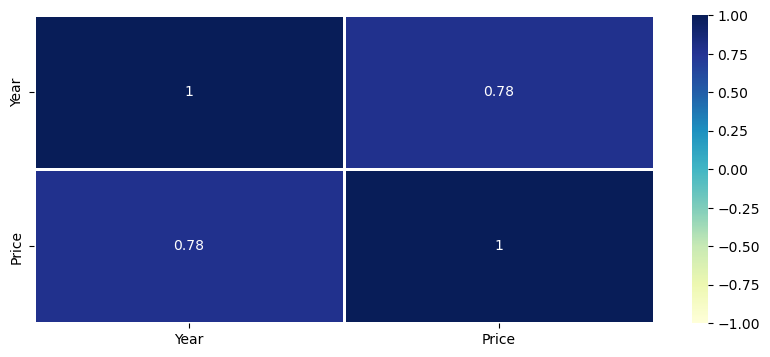

In [7]:
corrmatrix=df.corr()
plt.subplots(figsize=(10,4))
sns.heatmap(corrmatrix,annot=True,vmin=-1,vmax=1,linewidth=1,cmap='YlGnBu')

# ASSIGING INDEPENDENT AND DEPENDENT VARIABLE

In [8]:
y=df['Year']
x=df.drop(['Year'],axis=1)

# TESTING AND TRAINING

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [18]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([2017.11540491, 2016.70934205, 2016.30327919, 2016.10024777,
       2017.45379062, 2014.06993349, 2017.45379062, 2016.77701919,
       2016.77701919, 2017.45379062, 2014.34064206, 2017.45379062,
       2016.30327919, 2018.67197919, 2016.30327919, 2016.77701919,
       2014.67902777, 2015.28812205, 2015.08509063, 2017.04772776,
       2017.45379062, 2016.77701919, 2017.45379062, 2017.11540491,
       2017.04772776, 2017.31843633, 2015.8972028 , 2014.34064206])

In [11]:
from sklearn.metrics import mean_squared_error
print('MSE=',mean_squared_error(y_test,y_pred))
from sklearn.metrics import r2_score
print('r2 score = ',r2_score(y_test,y_pred))

MSE= 1.4998933155702905
r2 score =  0.4869474871696736


# LASSO REGRESSION

In [19]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1)
lasso.fit(x_train,y_train)
lasso.score(x_test,y_test),lasso.score(x_train,y_train)

(0.4869466856897259, 0.6358811055251175)

In [20]:
lasso.coef_

array([1.35353135e-05])